# Autoencoder

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

## Basic Model

In [0]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])

In [0]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [9]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [20]:
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

Epoch: 0001 Avg. cost = 0.0259
Epoch: 0002 Avg. cost = 0.0260
Epoch: 0003 Avg. cost = 0.0260
Epoch: 0004 Avg. cost = 0.0259
Epoch: 0005 Avg. cost = 0.0260
Epoch: 0006 Avg. cost = 0.0259
Epoch: 0007 Avg. cost = 0.0260
Epoch: 0008 Avg. cost = 0.0260
Epoch: 0009 Avg. cost = 0.0260
Epoch: 0010 Avg. cost = 0.0260
Epoch: 0011 Avg. cost = 0.0260
Epoch: 0012 Avg. cost = 0.0260
Epoch: 0013 Avg. cost = 0.0260
Epoch: 0014 Avg. cost = 0.0259
Epoch: 0015 Avg. cost = 0.0260
Epoch: 0016 Avg. cost = 0.0260
Epoch: 0017 Avg. cost = 0.0260
Epoch: 0018 Avg. cost = 0.0260
Epoch: 0019 Avg. cost = 0.0260
Epoch: 0020 Avg. cost = 0.0260


Original Images


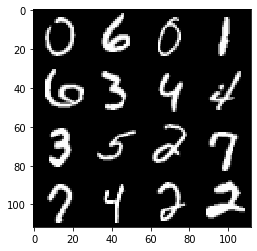

Reconstructed Images


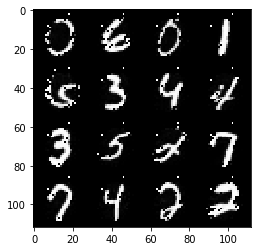

In [21]:
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(decoder, feed_dict={X: batch_x})
    
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])

    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

## Convolutional Model

In [0]:
# Fill in the details